In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi

def nnls_distribution(spectrum, nbins = 41):
    spacings = np.sort(spectrum)-np.roll(np.sort(spectrum),1)

    histogram, bin_edges = np.histogram(spacings[1:], bins = nbins_spacing, density = False )
    
    return histogram, bin_edges

def staircase_function(energy, spectrum, nbins = 41):
    '''Staircase function.'''
    return np.where(np.sort(np.append(spectrum, energy))==energy)[0][0]

In [29]:
thetas = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

i = -1 ### selected value of theta
Nx = 99
Ny = 73

parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    disorder = 0,
    theta = -(pi/2)*(thetas[i]/100),
)

In [30]:
#path = '/home/donisvelaa/data1/tangent_boundaries/final/'
name = 'ellipse_spectrum'
#spectrum_ellipse = np.load(path+name+'_Nx'+str(Nx)+'_Ny'+str(Ny)+'_theta'+str(theta)+'.npy', allow_pickle=True)
spectrum_ellipse = np.load(name+'_Nx'+str(parameters['Nx'])+'_Ny'+str(parameters['Ny'])+'_theta'+str(thetas[i])+'.npy', allow_pickle=True)

Text(0.5, 0, '$E$ $units$')

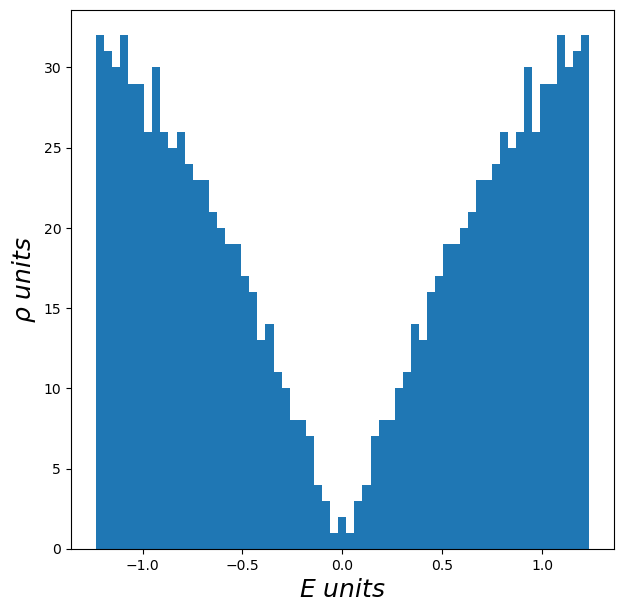

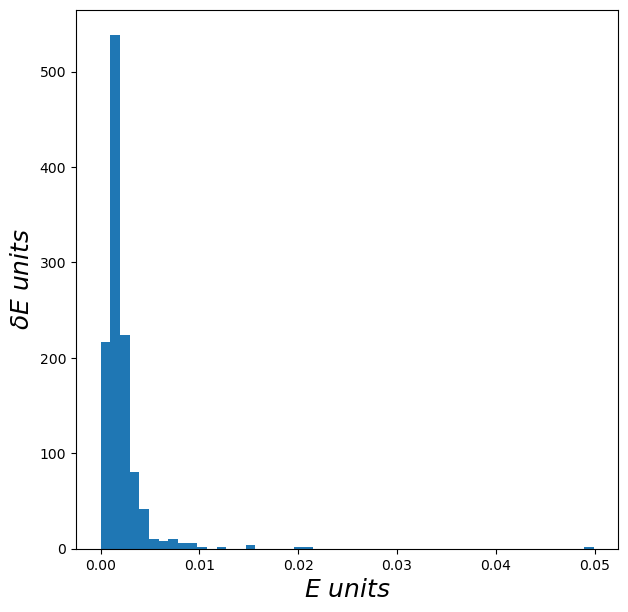

In [31]:
nbins = 61
ellipse_DOS, bin_edges_ellipse_DOS = np.histogram(spectrum_ellipse, bins = nbins, range = (-max(spectrum_ellipse),max(spectrum_ellipse)), density = False)

x = (bin_edges_ellipse_DOS[1:]+bin_edges_ellipse_DOS[:-1])/2
dx = (bin_edges_ellipse_DOS[1]-bin_edges_ellipse_DOS[0])/2

fig_ellipse_DOS = plt.figure(figsize = (7,7))
ax_ellipse_DOS = fig_ellipse_DOS.add_subplot(111)
ax_ellipse_DOS.bar(x,ellipse_DOS,width = 2*dx)
ax_ellipse_DOS.set_ylabel(r"$\rho$ $units$",fontsize = 18)
ax_ellipse_DOS.set_xlabel(r"$E$ $units$",fontsize = 18)
#ax_ellipse_DOS.set_ylim(0,2*(Nx+Ny))



nbins_spacing = 51
ls_distribution, bin_edges_ellipse_ls = nnls_distribution(spectrum_ellipse, nbins = nbins_spacing)

x = (bin_edges_ellipse_ls[1:]+bin_edges_ellipse_ls[:-1])/2
dx = (bin_edges_ellipse_ls[1]-bin_edges_ellipse_ls[0])/2

fig_ellipse_ls = plt.figure(figsize = (7,7))
ax_ellipse_ls = fig_ellipse_ls.add_subplot(111)
ax_ellipse_ls.bar(x,ls_distribution,width = 2*dx)
ax_ellipse_ls.set_ylabel(r"$\delta E$ $units$",fontsize = 18)
ax_ellipse_ls.set_xlabel(r"$E$ $units$",fontsize = 18)
#ax_ellipse_ls.set_ylim(0,2*(Nx+Ny))

(550.0, 610.0)

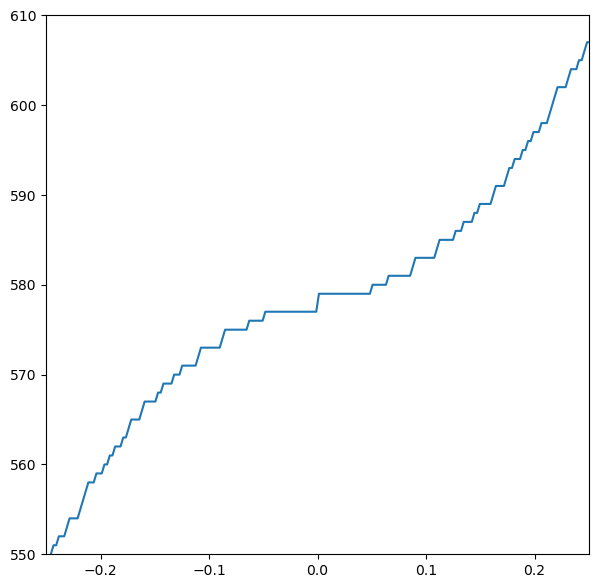

In [49]:
energies_ellipse = np.linspace(-max(spectrum_ellipse), max(spectrum_ellipse),1000)
staircase_ellipse = np.zeros(len(energies_ellipse))
for i, e in enumerate(energies_ellipse):
    staircase_ellipse[i] = staircase_function(e,spectrum_ellipse)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(energies_ellipse, staircase_ellipse)
ax.set_xlim(-0.25,0.25)
ax.set_ylim(550,610)

In [18]:
parameters['Nx'] = int(np.round(np.sqrt(pi*Nx*Ny/4)))
parameters['Ny'] = int(np.round(np.sqrt(pi*Nx*Ny/4)))
print(parameters['Nx'] )

#path = '/home/donisvelaa/data1/tangent_boundaries/final/'
name = 'square_spectrum'
#spectrum_square = np.load(path+name+'_Nx'+str(Nx)+'_Ny'+str(Ny)+'_theta'+str(theta)+'.npy', allow_pickle=True)
spectrum_square = np.load(name+'_Nx'+str(parameters['Nx'])+'_Ny'+str(parameters['Ny'])+'_theta'+str(thetas[i])+'.npy', allow_pickle=True)

75


Text(0.5, 0, '$E$ $units$')

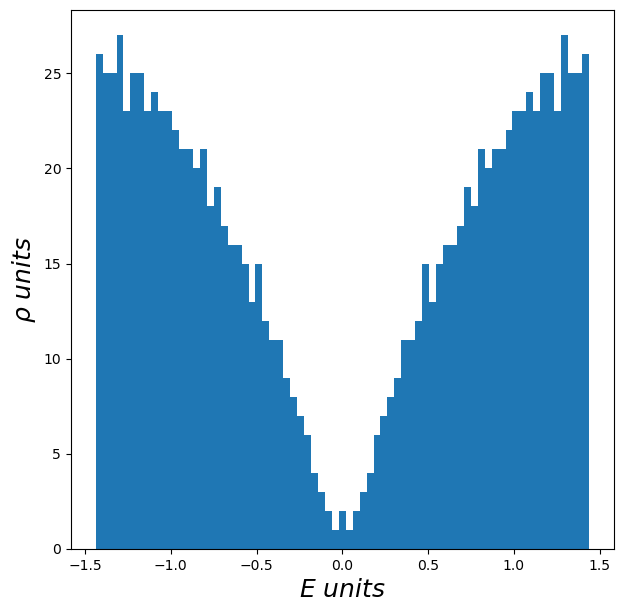

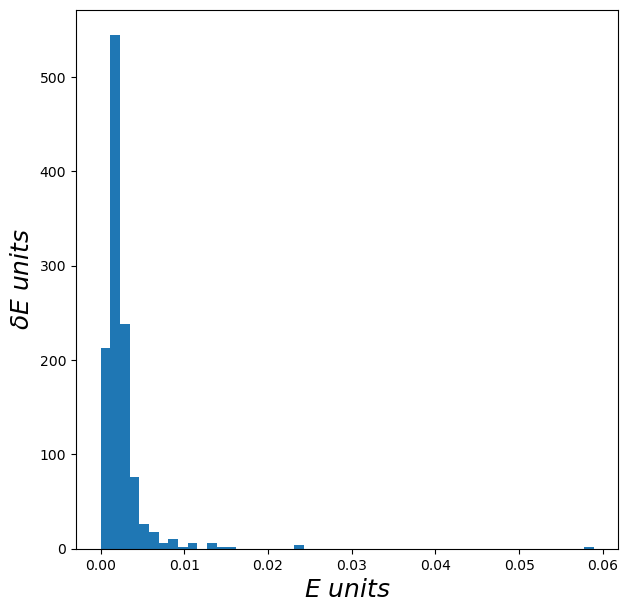

In [19]:
nbins = 71
square_DOS, bin_edges_square_DOS = np.histogram(spectrum_square, bins = nbins, range = (-max(spectrum_square),max(spectrum_square)), density = False)

x = (bin_edges_square_DOS[1:]+bin_edges_square_DOS[:-1])/2
dx = (bin_edges_square_DOS[1]-bin_edges_square_DOS[0])/2

fig_square_DOS = plt.figure(figsize = (7,7))
ax_square_DOS = fig_square_DOS.add_subplot(111)
ax_square_DOS.bar(x,square_DOS,width = 2*dx)
ax_square_DOS.set_ylabel(r"$\rho$ $units$",fontsize = 18)
ax_square_DOS.set_xlabel(r"$E$ $units$",fontsize = 18)
#ax_square_DOS.set_ylim(0,2*(Nx+Ny))



nbins_spacing = 51
ls_distribution, bin_edges_square_ls = nnls_distribution(spectrum_square, nbins = nbins_spacing)

x = (bin_edges_square_ls[1:]+bin_edges_square_ls[:-1])/2
dx = (bin_edges_square_ls[1]-bin_edges_square_ls[0])/2

fig_square_ls = plt.figure(figsize = (7,7))
ax_square_ls = fig_square_ls.add_subplot(111)
ax_square_ls.bar(x,ls_distribution,width = 2*dx)
ax_square_ls.set_ylabel(r"$\delta E$ $units$",fontsize = 18)
ax_square_ls.set_xlabel(r"$E$ $units$",fontsize = 18)
#ax_square_ls.set_ylim(0,2*(Nx+Ny))

In [20]:
# Now it doesn't seem like things are very different

# Next is the biggest system

In [13]:
parameters['Nx'] = int(np.round(np.sqrt(pi*Nx*Ny)))
parameters['Ny'] = int(np.round(np.sqrt(pi*Nx*Ny)))
print(parameters['Nx'] )

#path = '/home/donisvelaa/data1/tangent_boundaries/final/'
name = 'square_spectrum'
#spectrum_square = np.load(path+name+'_Nx'+str(Nx)+'_Ny'+str(Ny)+'_theta'+str(theta)+'.npy', allow_pickle=True)
spectrum_square = np.load(name+'_Nx'+str(parameters['Nx'])+'_Ny'+str(parameters['Ny'])+'_theta'+str(thetas[i])+'.npy', allow_pickle=True)

151


Text(0.5, 0, '$E$ $units$')

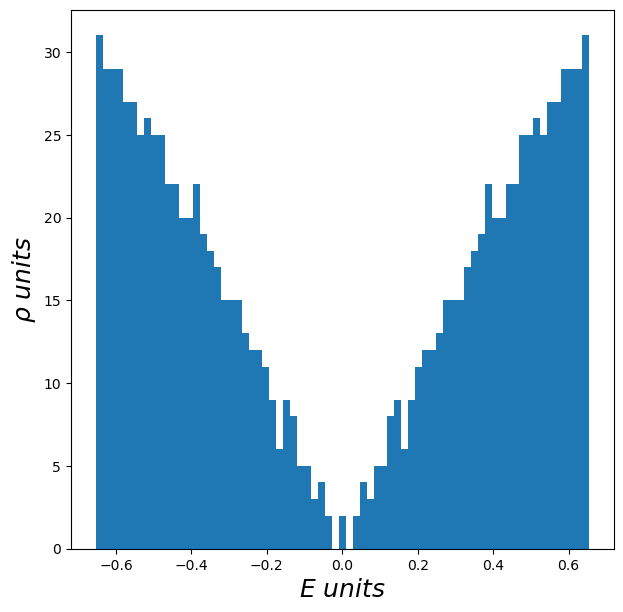

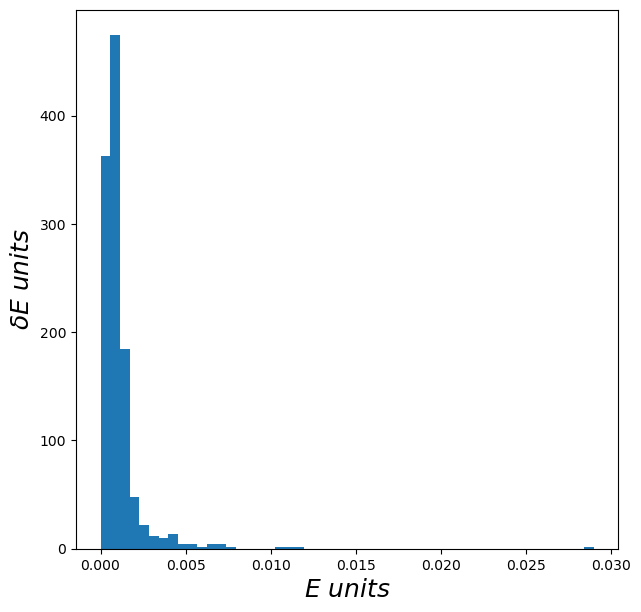

In [12]:
nbins = 71
square_DOS, bin_edges_square_DOS = np.histogram(spectrum_square, bins = nbins, range = (-max(spectrum_square),max(spectrum_square)), density = False)

x = (bin_edges_square_DOS[1:]+bin_edges_square_DOS[:-1])/2
dx = (bin_edges_square_DOS[1]-bin_edges_square_DOS[0])/2

fig_square_DOS = plt.figure(figsize = (7,7))
ax_square_DOS = fig_square_DOS.add_subplot(111)
ax_square_DOS.bar(x,square_DOS,width = 2*dx)
ax_square_DOS.set_ylabel(r"$\rho$ $units$",fontsize = 18)
ax_square_DOS.set_xlabel(r"$E$ $units$",fontsize = 18)
#ax_square_DOS.set_ylim(0,2*(Nx+Ny))



nbins_spacing = 51
ls_distribution, bin_edges_square_ls = nnls_distribution(spectrum_square, nbins = nbins_spacing)

x = (bin_edges_square_ls[1:]+bin_edges_square_ls[:-1])/2
dx = (bin_edges_square_ls[1]-bin_edges_square_ls[0])/2

fig_square_ls = plt.figure(figsize = (7,7))
ax_square_ls = fig_square_ls.add_subplot(111)
ax_square_ls.bar(x,ls_distribution,width = 2*dx)
ax_square_ls.set_ylabel(r"$\delta E$ $units$",fontsize = 18)
ax_square_ls.set_xlabel(r"$E$ $units$",fontsize = 18)
#ax_square_ls.set_ylim(0,2*(Nx+Ny))

We didn't do spectrum unfolding to study our system